In [14]:
# 손글씨 파일 불러오기_06_04_01
import glob
import imageio.v2 as imageio
import numpy as np

number_data = []

for image_file_name in glob.glob('example_?.png'):
    label = int(image_file_name[-5:-4])
    print("불러오기 성공했습니다.", image_file_name)
    img_array = imageio.imread(image_file_name, mode='L')
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01

    record = np.append(label, img_data)
    number_data.append(record)

inputs = np.array([record[1:] for record in number_data]).reshape(-1, 28, 28)

불러오기 성공했습니다. example_0.png
불러오기 성공했습니다. example_1.png
불러오기 성공했습니다. example_2.png
불러오기 성공했습니다. example_3.png
불러오기 성공했습니다. example_4.png
불러오기 성공했습니다. example_5.png
불러오기 성공했습니다. example_6.png
불러오기 성공했습니다. example_7.png
불러오기 성공했습니다. example_8.png
불러오기 성공했습니다. example_9.png


1/1 [==============================] - 0s 79ms/step
파일명:example_9
딥러닝이 판단한 숫자는 9 입니다.
정답입니다!


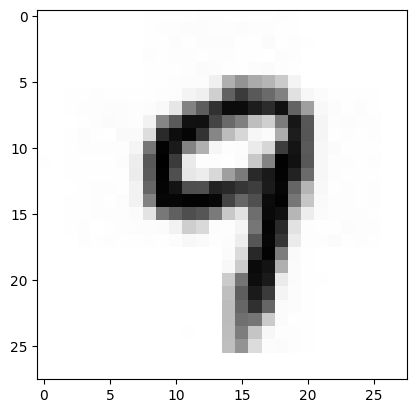

In [16]:
# 저장된 모델 불러와 새 이미지에 적용_06_04_02
import tensorflow as tf
import matplotlib.pyplot as plt

# 모델을 로드합니다.
loaded_model = tf.keras.models.load_model("number_model.keras")

# 예측할 이미지 선택
item = int(input("이미지 번호는?(0부터 {}까지 가능): ".format(len(number_data) - 1)))

# 선택한 이미지 표시
plt.imshow(number_data[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')
correct_label = number_data[item][0]

# 모델에 입력 데이터를 주고 예측
input_image = number_data[item][1:].reshape(1, 28, 28)
outputs = loaded_model.predict(input_image)
label = np.argmax(outputs)

# 파일명 출력
print("파일명:", "example_", item, sep="")

# AI 예측 결과 출력
print('딥러닝이 판단한 숫자는', label, '입니다.')

# 정답 여부 출력
if label == correct_label:
    print("정답입니다!")
else:
    print("오답입니다!")